# Sentimental Analysis

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
df = pd.read_csv("Sentimentdata.csv")

In [4]:
df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


## Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 1   sentiment   3090 non-null   object
 2   text        3090 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.5+ KB


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.head()

,sentiment,text
0,sad,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...


In [8]:
df.duplicated().sum()

42

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3048 entries, 0 to 3089
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  3048 non-null   object
 1   text       3048 non-null   object
dtypes: object(2)
memory usage: 71.4+ KB


## Dependent Label Encoding

In [12]:
df['sentiment'].unique()

array(['sad', 'joy', 'fear', 'anger'], dtype=object)

In [13]:
df['sentiment'].value_counts()

fear     796
sad      770
anger    766
joy      716
Name: sentiment, dtype: int64

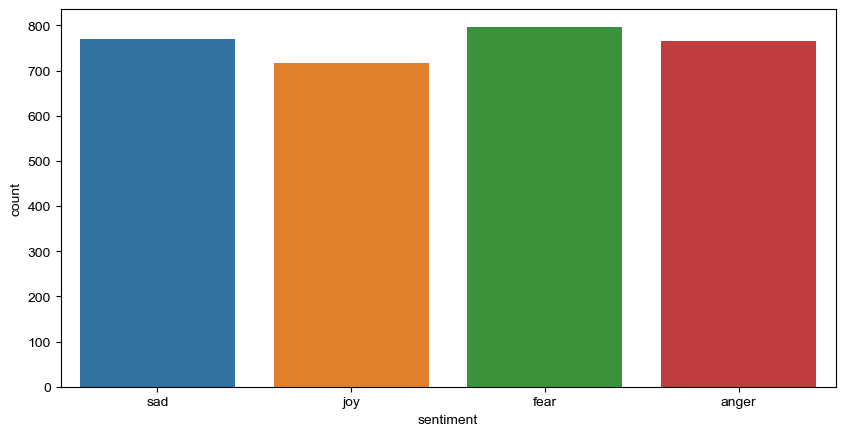

In [14]:
plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(df['sentiment'])
sns.set_style("darkgrid")

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [16]:
df.head()
# 0 --> Anger
# 1 --> Fear
# 2--> Joy
# 3 --> Sad

,sentiment,text
0,3,agree the poor in india are treated badly thei...
1,2,if only i could have spent the with this cutie...
2,2,will nature conservation remain a priority in ...
3,3,coronavirus disappearing in italy show this to...
4,3,uk records lowest daily virus death toll since...


In [17]:
df['sentiment'].unique()

array([3, 2, 1, 0])

In [18]:
df['sentiment'].value_counts()

1    796
3    770
0    766
2    716
Name: sentiment, dtype: int64

In [19]:
df.shape

(3048, 2)

## Data Preprocessing

In [20]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
ps = PorterStemmer()
wnl = WordNetLemmatizer()

class transformation():
    def __init__(self):
        self.text = ""
        
    def text_transformation(self, text):
        y = []
        text = text.split()           # Tokenization

        for i in text:
            y.append(ps.stem(i))          # Stemming

        text = y[:]
        y.clear()

        for i in text:
            y.append(wnl.lemmatize(i))           # Lemmitization

        text = y[:]
        y.clear()

        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)           # StopWord and Punctation Removal

        z = " ".join(y)
        z = re.sub(r'http\S+', ' ', z)      # Removing all the link releted text
        z = re.sub('[^a-zA-Z]', ' ',  z)    # Removing all the element except a-z and A-Z
        
        return z

In [21]:
tf = transformation()

In [22]:
df['text'][0]

'agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals'

In [23]:
tf.text_transformation(df['text'][0])

'agre poor india treat badli poor seek live singapor treat like citizen given free medic treatment given food daili sim card call home tell famili fine covid    case treat foc hospit'

In [24]:
df['transformed_text'] = df['text'].apply(tf.text_transformation)

In [25]:
df.head()

,sentiment,text,transformed_text
0,3,agree the poor in india are treated badly thei...,agre poor india treat badli poor seek live sin...
1,2,if only i could have spent the with this cutie...,onli could spent thi cuti vc sakshi n g h co...
2,2,will nature conservation remain a priority in ...,natur conserv remain prioriti post corona bang...
3,3,coronavirus disappearing in italy show this to...,coronaviru disappear itali show thi intellect...
4,3,uk records lowest daily virus death toll since...,uk record lowest daili viru death toll sinc st...


## Visualization

In [26]:
from wordcloud import WordCloud as wc

In [27]:
# Fear(1)
fear_text = df[df['sentiment'] == 1]
all_words_fear = ' '.join([text for text in fear_text.transformed_text])
wordcloud_fear = wc(width= 1000, height= 800, max_font_size = 120, collocations = False).generate(all_words_fear)

# Sad(3)
sad_text = df[df['sentiment'] == 3]
all_words_sad = ' '.join([text for text in sad_text.transformed_text])
wordcloud_sad = wc(width= 1000, height= 800, max_font_size = 120, collocations = False).generate(all_words_sad)

# Anger(0)
anger_text = df[df['sentiment'] == 0]
all_words_anger = ' '.join([text for text in anger_text.transformed_text])
wordcloud_anger = wc(width= 1000, height= 800, max_font_size = 120, collocations = False).generate(all_words_anger)

# Joy(2)
joy_text = df[df['sentiment'] == 2]
all_words_joy = ' '.join([text for text in joy_text.transformed_text])
wordcloud_joy = wc(width= 1000, height= 800, max_font_size = 120, collocations = False).generate(all_words_joy)

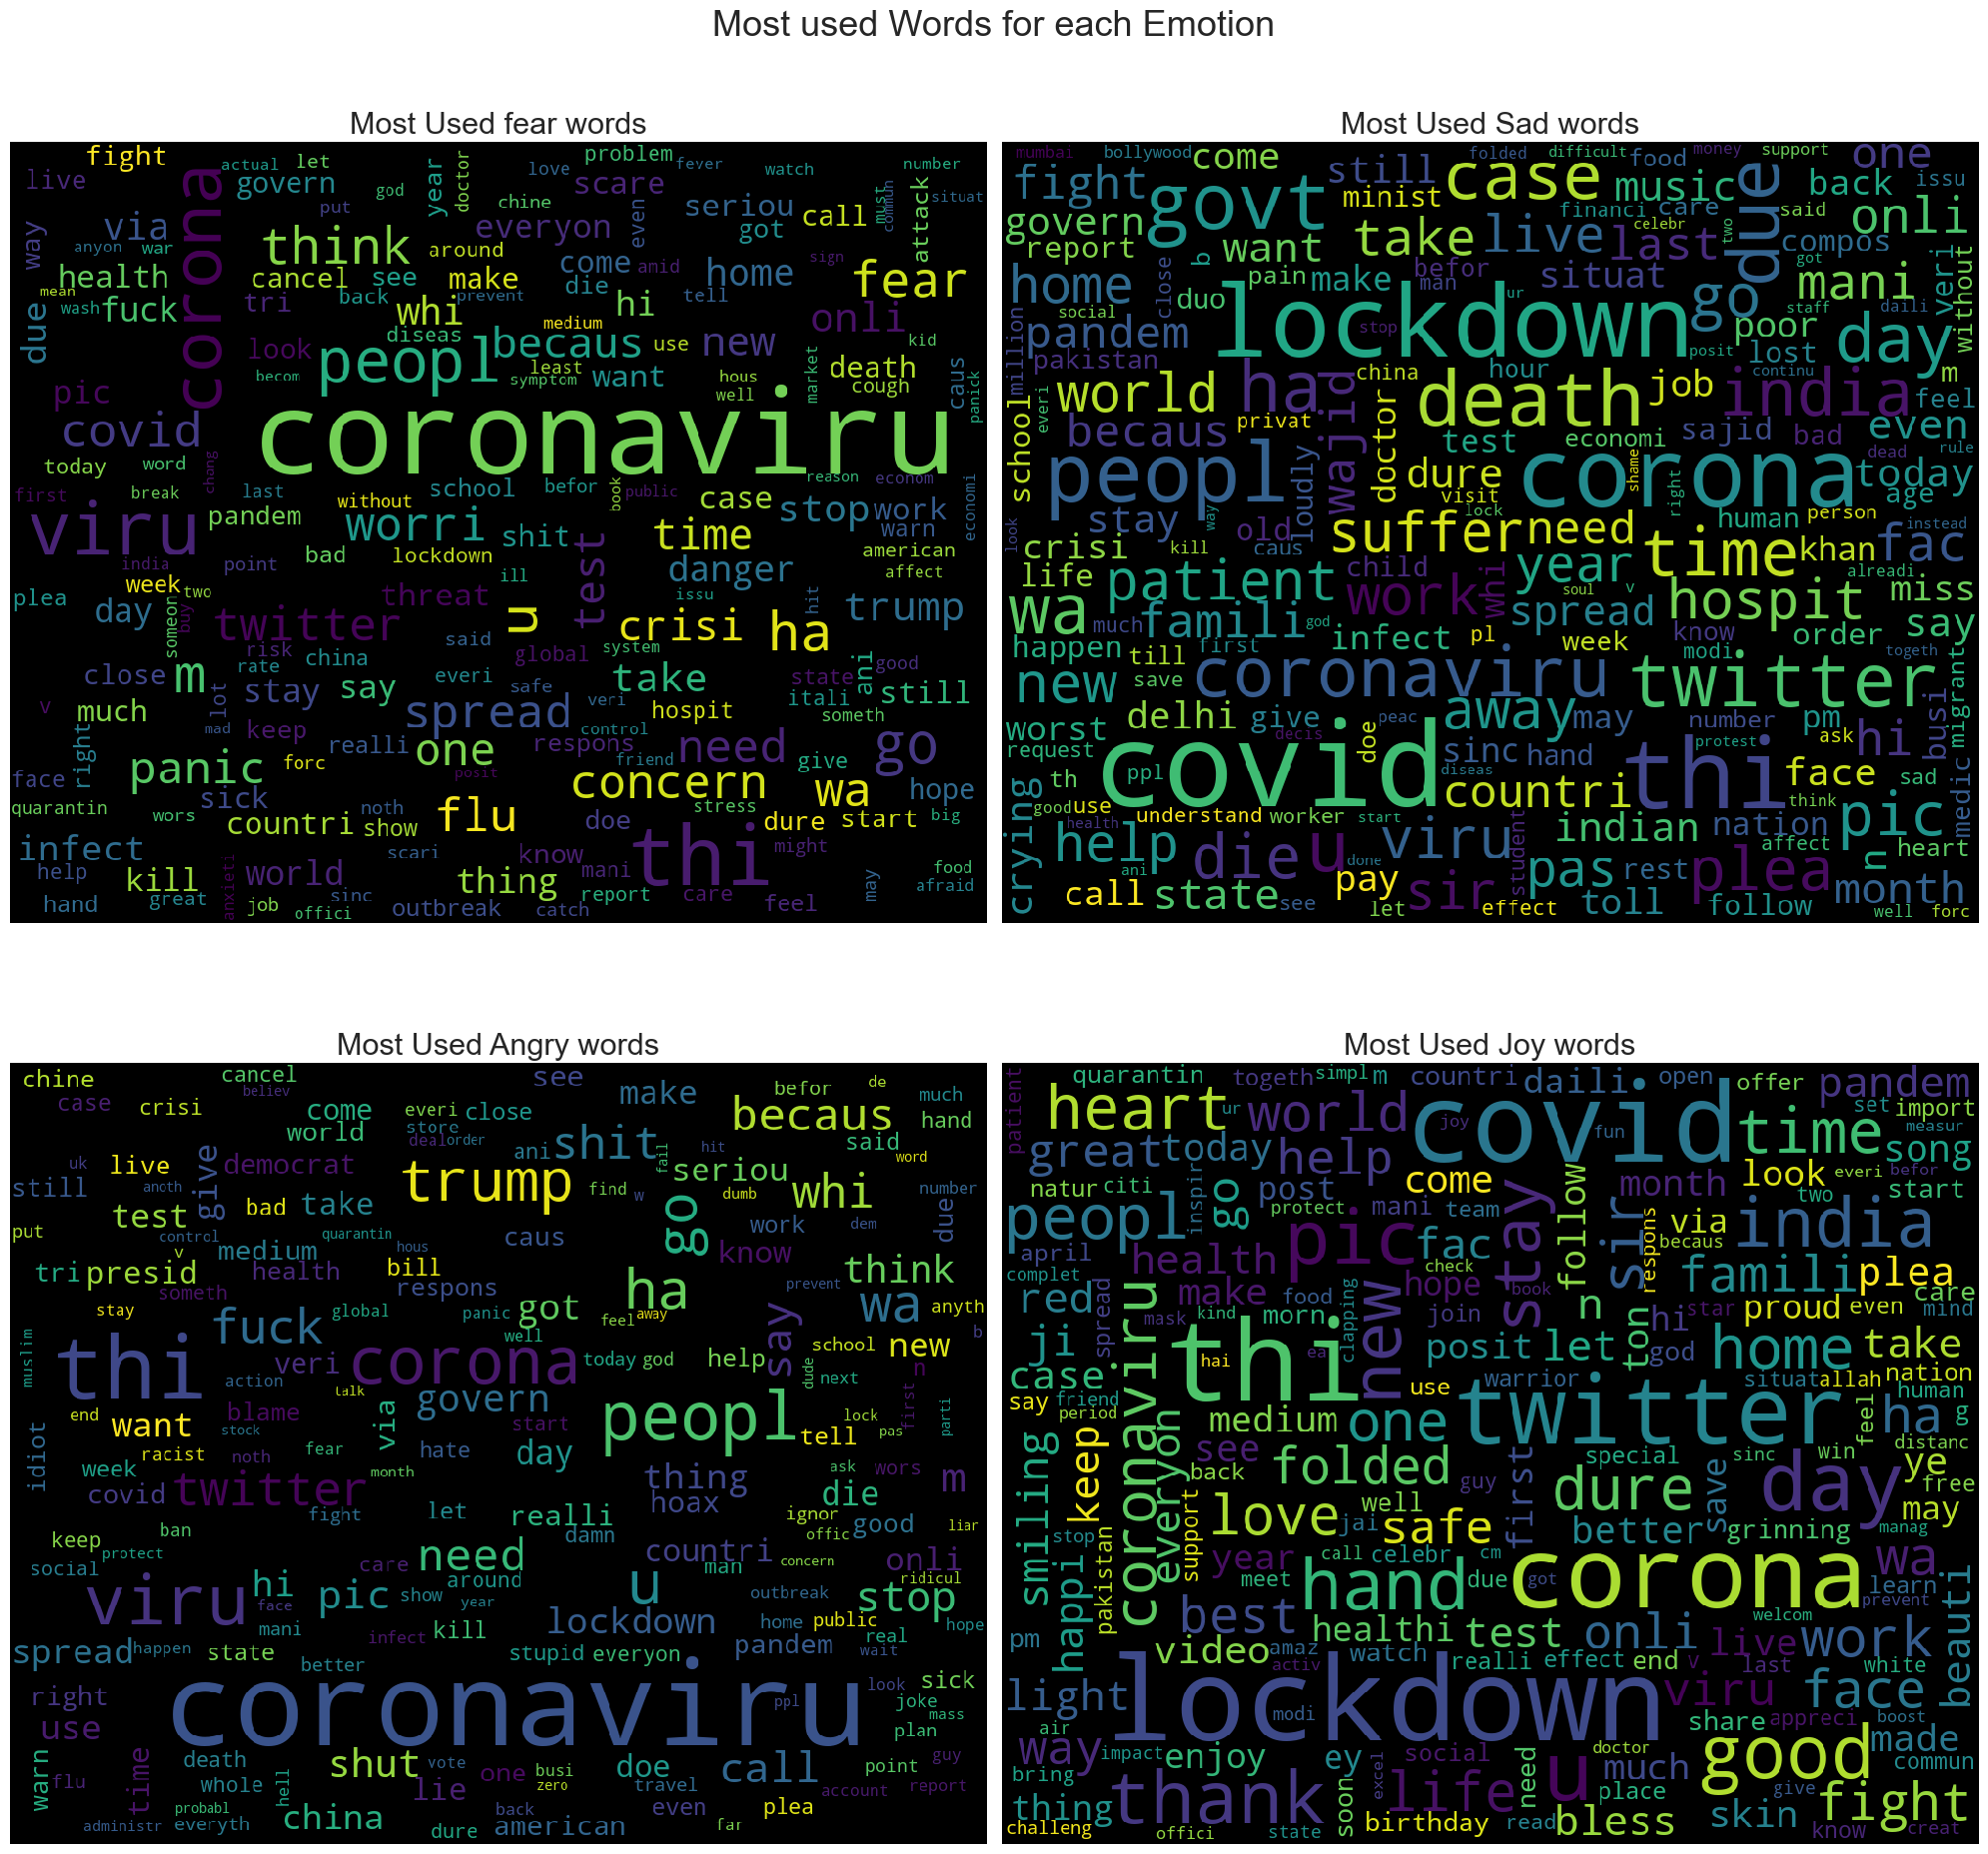

In [28]:
fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(20,20), dpi = 100)

axes[0][0].imshow(wordcloud_fear, interpolation='nearest')
axes[0][0].set_title("Most Used fear words", fontsize=22)
axes[0][0].axis("off")

axes[0][1].imshow(wordcloud_sad, interpolation='nearest')
axes[0][1].set_title("Most Used Sad words", fontsize=22)
axes[0][1].axis("off")

axes[1][0].imshow(wordcloud_anger, interpolation='nearest')
axes[1][0].set_title("Most Used Angry words", fontsize=22)
axes[1][0].axis("off")

axes[1][1].imshow(wordcloud_joy, interpolation='nearest')
axes[1][1].set_title("Most Used Joy words", fontsize=22)
axes[1][1].axis("off")

fig.suptitle("Most used Words for each Emotion", fontsize=26)
plt.tight_layout()
plt.show()

In [29]:
from nltk.tokenize import WhitespaceTokenizer
tk = WhitespaceTokenizer()

class visualizationTransformation():
    def __init__(self):
        self.text = ""
        self.column_text = ""
        self.fig_title = ""
        self.plot_color = ""
        self.quantity = 10
        
    def counter(self, text, column_text, fig_title, plot_color, quantity):
        all_words = ' '.join([text for text in text[column_text]])
        token_phrase = tk.tokenize(all_words)
        frequency = nltk.FreqDist(token_phrase)
        df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
        df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
        plt.figure(figsize=(10,10), dpi = 100)
        ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = plot_color)
        ax.set(ylabel = "Count")
        plt.xticks(rotation='vertical')
        plt.title(fig_title)
        plt.show()

In [30]:
vtf = visualizationTransformation()

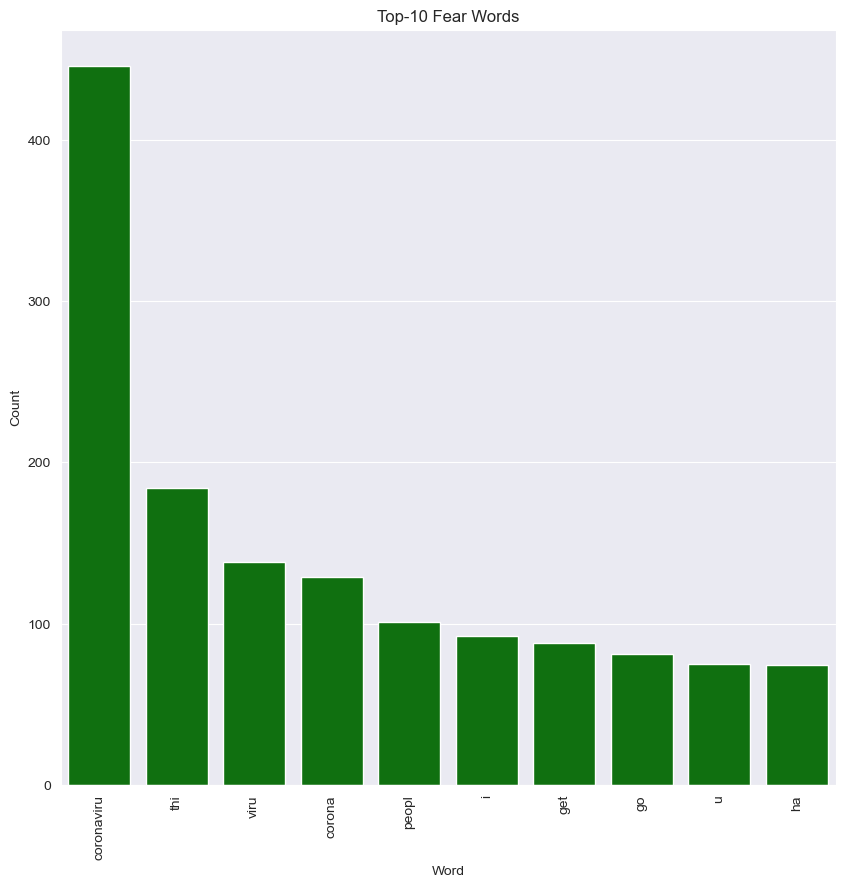

In [31]:
# Most Fear Words
vtf.counter(df[df['sentiment'] == 1], 'transformed_text', 'Top-10 Fear Words', 'green', 10)

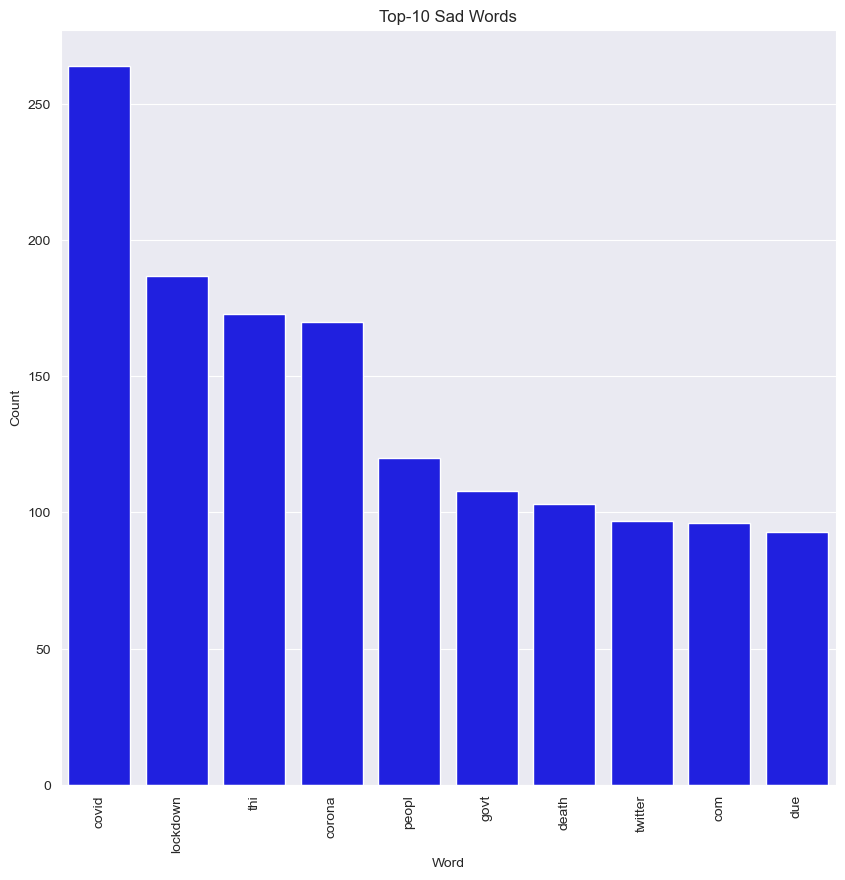

In [32]:
# Most Sad Words
vtf.counter(df[df['sentiment'] == 3], 'transformed_text', 'Top-10 Sad Words', 'blue',10)

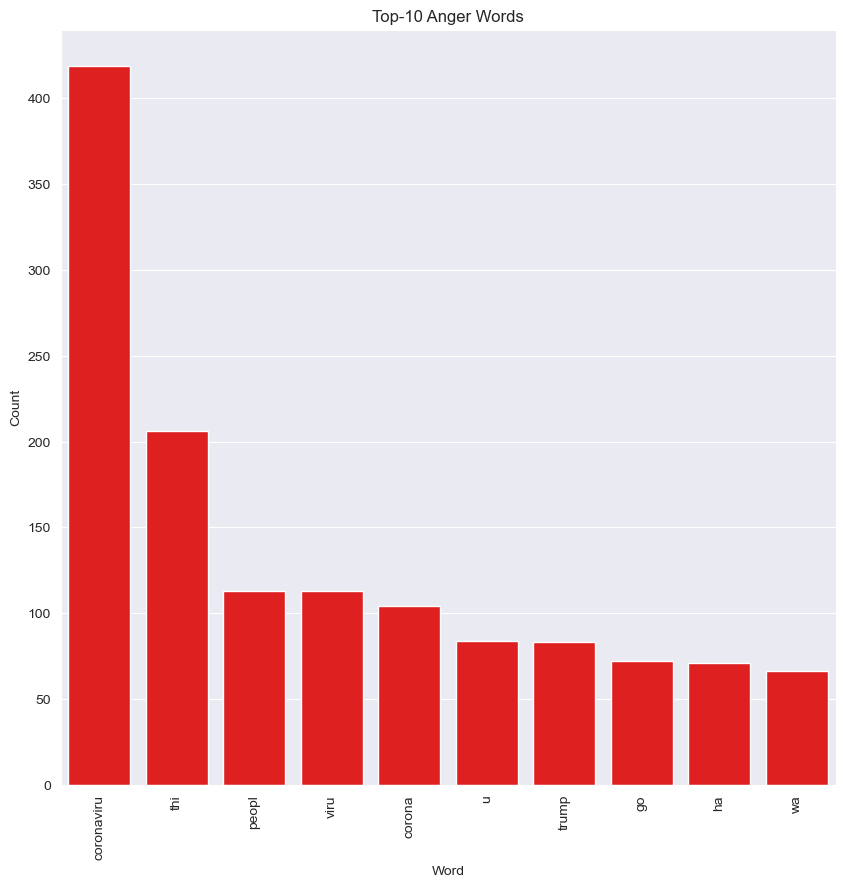

In [33]:
# Most Anger Words
vtf.counter(df[df['sentiment'] == 0], 'transformed_text', 'Top-10 Anger Words', 'red', 10)

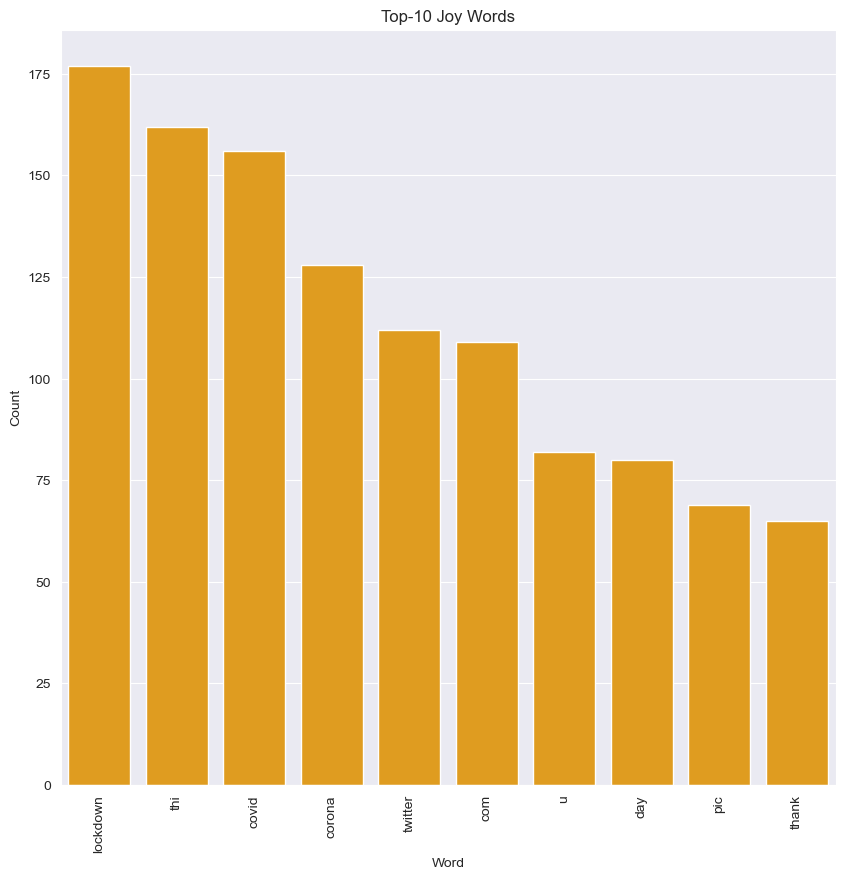

In [34]:
# Most Joy Words
vtf.counter(df[df['sentiment'] == 2], 'transformed_text', 'Top-10 Joy Words', 'orange', 10)

## Encoding of Independent & Dependent Data

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
X = vector.fit_transform(df['transformed_text'])
y = df['sentiment']

In [36]:
print(X)

  (0, 3135)	0.12752316174279663
  (0, 2502)	0.21291797224041042
  (0, 1045)	0.11270030274174049
  (0, 1506)	0.07671571233980831
  (0, 2446)	0.17566802287476904
  (0, 2356)	0.12338110852575408
  (0, 6816)	0.13898378195358804
  (0, 3103)	0.11123619656069994
  (0, 986)	0.12007446431461066
  (0, 1020)	0.1833980857912587
  (0, 6267)	0.22381288400674143
  (0, 1619)	0.15016607783488287
  (0, 2513)	0.1395616570990087
  (0, 7056)	0.1663089667543042
  (0, 4249)	0.1476839920714835
  (0, 2571)	0.14931298527545867
  (0, 2717)	0.31876211538534466
  (0, 1207)	0.14848614592634135
  (0, 3949)	0.10798102776493823
  (0, 6281)	0.19015094434054716
  (0, 3976)	0.12035880727076735
  (0, 6077)	0.19015094434054716
  (0, 518)	0.19429299755758972
  (0, 7055)	0.4858261720239405
  (0, 3331)	0.11103340194820294
  :	:
  (3046, 1661)	0.16568134445217728
  (3046, 6898)	0.18624411133321964
  (3046, 7740)	0.12693225441889808
  (3046, 896)	0.18624411133321964
  (3046, 4441)	0.15673569146994432
  (3046, 7450)	0.2053373395

In [37]:
print(y)

0       3
1       2
2       2
3       3
4       3
       ..
3084    0
3086    0
3087    2
3088    3
3089    3
Name: sentiment, Length: 3048, dtype: int32


## Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)

In [39]:
len(y_test)

762

## Logistic Regression

In [40]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, plot_confusion_matrix

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=56)
lr.fit(X_train,y_train)
y_predLR = lr.predict(X_test)

acc_lrTrain = lr.score(X_train,y_train) * 100
acc_lrTest = accuracy_score(y_predLR, y_test) * 100
print("Training Accuracy: ", acc_lrTrain)
print("Validation Accuracy: ", acc_lrTest)

Training Accuracy:  95.40682414698163
Validation Accuracy:  71.78477690288713


In [42]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       197
           1       0.68      0.62      0.65       200
           2       0.81      0.76      0.78       185
           3       0.75      0.82      0.79       180

    accuracy                           0.72       762
   macro avg       0.72      0.72      0.72       762
weighted avg       0.72      0.72      0.72       762



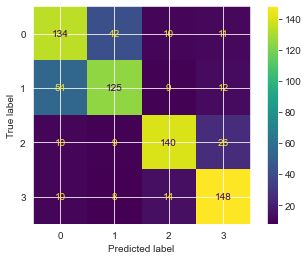

In [43]:
conf_matrix_LR = plot_confusion_matrix(lr, X_test, y_test)

## Linear Support Vector Classification (SVC)

In [44]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(max_iter=11)
lsvc.fit(X_train, y_train)
y_predLSVC = lsvc.predict(X_test)

acc_lsvcTrain = lsvc.score(X_train,y_train) * 100
acc_lsvcTest = accuracy_score(y_predLSVC, y_test) * 100
print("Training Accuracy: ", acc_lsvcTrain)
print("Validation Accuracy: ", acc_lsvcTest)

Training Accuracy:  99.65004374453194
Validation Accuracy:  71.5223097112861


In [45]:
print(classification_report(y_test,y_predLSVC))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       197
           1       0.67      0.61      0.64       200
           2       0.77      0.77      0.77       185
           3       0.78      0.81      0.80       180

    accuracy                           0.72       762
   macro avg       0.72      0.72      0.72       762
weighted avg       0.71      0.72      0.71       762



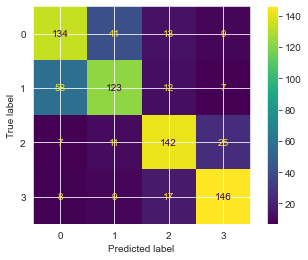

In [46]:
conf_matrix_LSVC = plot_confusion_matrix(lsvc, X_test, y_test)

## C-Support Vector Classification (SVC)

In [47]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_predSVM = svm.predict(X_test)

acc_svmTrain = svm.score(X_train,y_train) * 100
acc_svmTest = accuracy_score(y_predSVM, y_test) * 100
print("Training Accuracy: ", acc_svmTrain)
print("Validation Accuracy: ", acc_svmTest)

Training Accuracy:  99.82502187226596
Validation Accuracy:  71.12860892388451


In [48]:
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       197
           1       0.65      0.62      0.64       200
           2       0.81      0.75      0.78       185
           3       0.76      0.82      0.79       180

    accuracy                           0.71       762
   macro avg       0.72      0.71      0.71       762
weighted avg       0.71      0.71      0.71       762



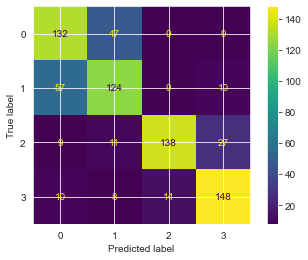

In [49]:
conf_matrix_SVM = plot_confusion_matrix(svm, X_test, y_test)

## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000,  criterion='entropy', random_state=101)
rfc.fit(X_train,y_train)
y_predRFC = rfc.predict(X_test)

acc_rfcTrain = rfc.score(X_train,y_train) * 100
acc_rfcTest = accuracy_score(y_predRFC, y_test) * 100
print("Training Accuracy: ", acc_rfcTrain)
print("Validation Accuracy: ", acc_rfcTest)

Training Accuracy:  99.95625546806649
Validation Accuracy:  64.56692913385827


In [51]:
print(classification_report(y_test,y_predRFC))

              precision    recall  f1-score   support

           0       0.55      0.69      0.61       197
           1       0.69      0.51      0.58       200
           2       0.65      0.76      0.70       185
           3       0.76      0.64      0.69       180

    accuracy                           0.65       762
   macro avg       0.66      0.65      0.65       762
weighted avg       0.66      0.65      0.64       762



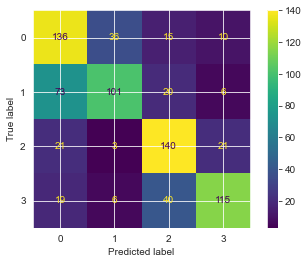

In [52]:
conf_matrix_RFC = plot_confusion_matrix(rfc, X_test, y_test)

## Performance Analysis

In [53]:
performance_df = pd.DataFrame({'Algorithm':['Logistic Regression','Linear SVC', 'SVM', 'Random Forest Classifier'], 'Training Accuracy':[acc_lrTrain, acc_lsvcTrain, acc_svmTrain, acc_rfcTrain], 'Testing Accuracy':[acc_lrTest, acc_lsvcTest, acc_svmTest, acc_rfcTest]}).set_index('Algorithm')

In [54]:
performance_df.sort_values('Testing Accuracy',ascending=False)

,Training Accuracy,Testing Accuracy
Algorithm,,
Logistic Regression,95.406824,71.784777
Linear SVC,99.650044,71.522310
SVM,99.825022,71.128609
Random Forest Classifier,99.956255,64.566929


## Exporting Model

In [55]:
df.head()

,sentiment,text,transformed_text
0,3,agree the poor in india are treated badly thei...,agre poor india treat badli poor seek live sin...
1,2,if only i could have spent the with this cutie...,onli could spent thi cuti vc sakshi n g h co...
2,2,will nature conservation remain a priority in ...,natur conserv remain prioriti post corona bang...
3,3,coronavirus disappearing in italy show this to...,coronaviru disappear itali show thi intellect...
4,3,uk records lowest daily virus death toll since...,uk record lowest daili viru death toll sinc st...


In [56]:
df.transformed_text[0]

'agre poor india treat badli poor seek live singapor treat like citizen given free medic treatment given food daili sim card call home tell famili fine covid    case treat foc hospit'

In [57]:
lsvc.predict(vector.transform([df.transformed_text[0]]))

array([3])

In [58]:
sentimentAnalysis_model_LSVC = LinearSVC()
sentimentAnalysis_model_LSVC.fit(X,y)

y_finalLSVC = sentimentAnalysis_model_LSVC.predict(X)
accFinal1 = round(accuracy_score(y_finalLSVC, y), 2) * 100
print("Final Accuracy: ", accFinal1)

Final Accuracy:  99.0


In [59]:
sentimentAnalysis_model_LSVC.predict(vector.transform([df.transformed_text[0]]))

array([3])

In [60]:
import joblib

In [61]:
joblib.dump(tf,'final_processing.pkl')
joblib.dump(vector,'final_vector.pkl')
joblib.dump(sentimentAnalysis_model_LSVC,'sentimentAnalysis_model_LSVC.pkl')

['sentimentAnalysis_model_LSVC.pkl']

In [62]:
loaded_tf = joblib.load('final_processing.pkl')
loaded_vector = joblib.load('final_vector.pkl')
loaded_model = joblib.load('sentimentAnalysis_model_LSVC.pkl')

In [63]:
def sentiment_predictorLSVC(msg):
    a = loaded_tf.text_transformation(msg)
    prediction = loaded_model.predict(loaded_vector.transform([a]))
    if prediction[0] == 0:
        return "Anger"
    elif prediction[0] == 1:
        return "Fear"
    elif prediction[0] == 2:
        return "Joy"
    else:
        return "Sad"

In [64]:
df.text[0]

'agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals'

In [65]:
sentiment_predictorLSVC(df.text[0])

'Sad'

In [66]:
df.text[1]

'if only i could have spent the with this cutie vc sakshi__s i n g h coast crossing republik …'

In [67]:
sentiment_predictorLSVC(df.text[1])

'Joy'